## Fish weight  prediction

#### This is a regression problem in which, we will try to predict Fish weight.

#### https://www.kaggle.com/code/nitinchoudhary012/fish-weight-prediction/data

##### Attribute information

Species: species name of fish

Weight: weight of fish in Gram g

Length1:vertical length in cm

Length2:diagonal length in cm

Length3:cross length in cm

Height:height in cm

Width:diagonal width in cm

##### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from fancyimpute import IterativeImputer

In [2]:
data = pd.read_csv("Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [5]:
data.shape

(159, 7)

##### Check for null values

In [6]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

##### No null values

##### Outlier treatment

##### Box plots

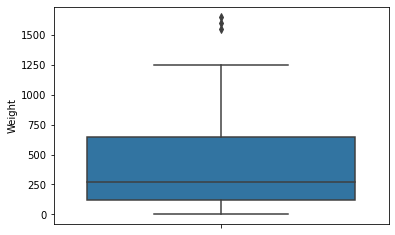

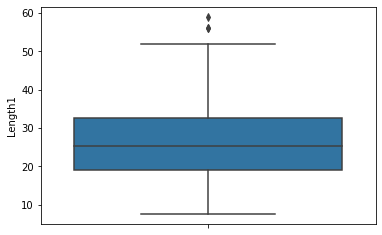

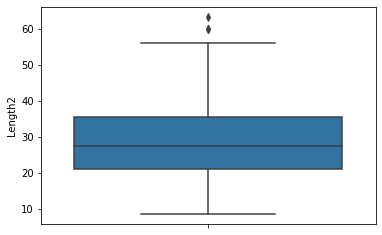

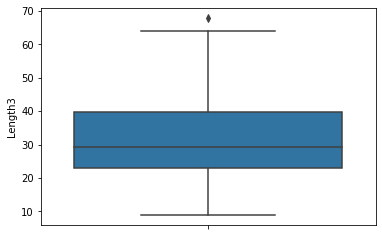

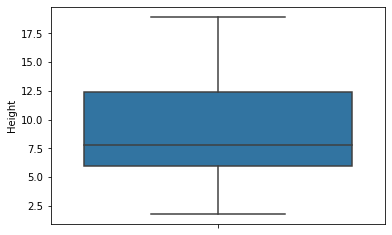

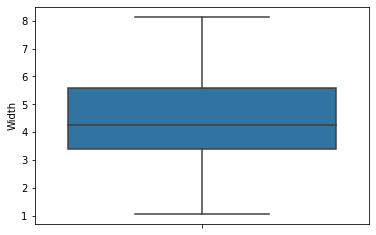

In [7]:
for i in data.columns:
    if data[i].dtype!= "object":
        sns.boxplot(y=data[i])
        plt.show()

##### Setting outlier limits

In [8]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [9]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

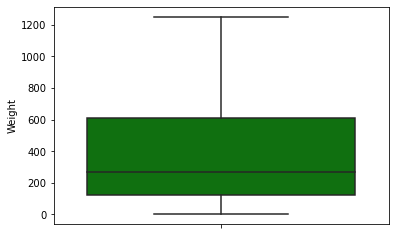

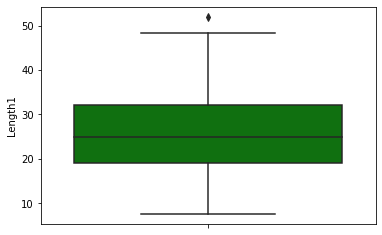

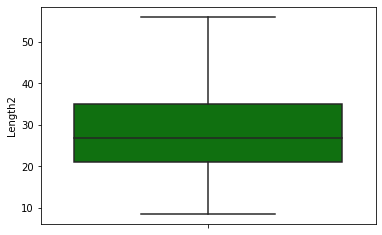

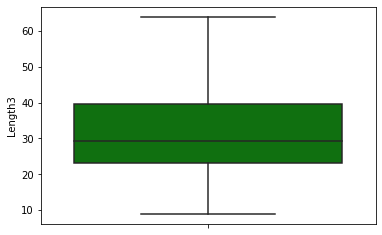

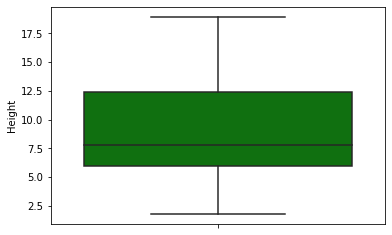

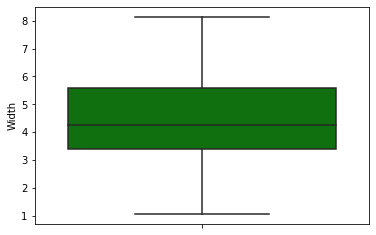

In [10]:
for i in data.columns:
    if data[i].dtype!= "object":
        sns.boxplot(y=data[i], color="Green")
        plt.show()

#### We have treated the outliers. Lets drop the nan values now.

In [11]:
data.dropna(inplace=True)

##### Check for duplicated data

In [12]:
data.duplicated().sum()

0

##### No duplicate entries

##### Correlation matrix

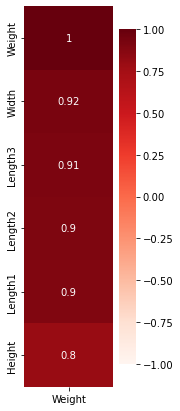

In [13]:
plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(data.corr()[['Weight']].sort_values(by='Weight', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Reds')

#### All the variables are highly correlated with the target variable.

##### Label encoding categorical column "Spiecies"

In [14]:
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         14
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [15]:
data.replace({"Perch":7,"Bream":6,"Roach":5,"Pike":4,"Smelt":3,"Parkki":2,"Whitefish":1}, inplace=True)

In [16]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,6,242.0,23.2,25.4,30.0,11.5200,4.0200
1,6,290.0,24.0,26.3,31.2,12.4800,4.3056
2,6,340.0,23.9,26.5,31.1,12.3778,4.6961
3,6,363.0,26.3,29.0,33.5,12.7300,4.4555
4,6,430.0,26.5,29.0,34.0,12.4440,5.1340


#### Selecting x & y

In [17]:
x = data.drop("Weight", axis=1).values

In [18]:
y = data["Weight"].values

#### Scaling x

In [19]:
sc = StandardScaler()

In [20]:
x = sc.fit_transform(x)

##### Splitting the data into training and testing

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Model building

In [22]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
}

In [23]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    score = r2_score(y_test, model.predict(x_test))
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  0.9220607410135702
mae:  72.5628266706201
mse:  7343.549844446339
rmse_test:  85.69451466953028
****************************************************************************************************
model trained with Ridge
r2score:  0.9121387422934994
mae:  76.96612308489678
mse:  8278.414931758218
rmse_test:  90.98579521968371
****************************************************************************************************
model trained with LinearSVR
r2score:  -0.4742648733136725
mae:  276.9484483488211
mse:  138907.37122584542
rmse_test:  372.7027920821702
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  0.9326098601593487
mae:  51.690625000000004
mse:  6349.5965625
rmse_test:  79.68435582032397
****************************************************************************************************
model trained with GradientBoostingRegre

##### We can see that the RandomForestRegressor is having th best perfomance. Lts try to increase its accuracy using Hyper parameter tuning.

#### Create the parameter grid based on the results of random search 

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [25]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [26]:
rfr_RandomGrid = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [27]:
rfr_RandomGrid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [28]:
rfr_RandomGrid.best_params_

{'n_estimators': 72,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [29]:
rfr_best_random = RandomForestRegressor(n_estimators= 17,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 4,
 bootstrap= True)

In [30]:
rfr_best_random.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=17)

In [31]:
y_pred_rfr_random = rfr_best_random.predict(x_test)

##### Metrics

In [32]:
score = r2_score(y_test, y_pred_rfr_random)
mae = mean_absolute_error(y_test, y_pred_rfr_random)
mse = mean_squared_error(y_test, y_pred_rfr_random)
rmse = np.sqrt(mse)
print("r2score: ",score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

r2score:  0.9613481532586665
mae:  44.338999529772366
mse:  3641.832971164162
rmse_test:  60.34760120472198


#### Since there is no increment after the hyperparameter tuning, we may use the default parameters for the predictions.

In [33]:
rfr = RandomForestRegressor().fit(x_train, y_train)

In [34]:
y_pred = rfr.predict(x)

##### Saving the output in a data frame

In [35]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"))
OUTPUT.head()

,ACTUAL,PREDICTION
0,242.0,252.34
1,290.0,297.14
2,340.0,319.60
3,363.0,369.15
4,430.0,429.53
